In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats import pearsonr

In [4]:
df = pd.read_csv('data/merged.csv')
cTable = df[['entity','gini_index', 'ladder_score']]
zTable = cTable.copy()
test = stats.zscore(zTable['gini_index'])
zTable.insert(len(zTable.columns),'xz-score',test)

test = stats.zscore(zTable['ladder_score'])
zTable.insert(len(zTable.columns),'yz-score',test)



outliers = zTable[(zTable['xz-score'].abs() >= 3) | (zTable['yz-score'].abs() >= 3) ]
zTables = zTable[(zTable['xz-score'].abs() < 3) | (zTable['yz-score'].abs() < 3)]

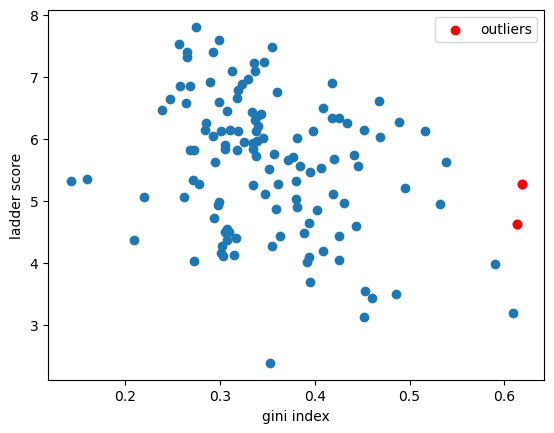

In [5]:
cols = zTable.to_numpy()

x = cols[:,1]
y = cols[:,2]
ax = plt.scatter(x,y)

cols = outliers.to_numpy()
x = cols[:,1]
y = cols[:,2]

ax = plt.scatter(x,y, c = 'red', label = 'outliers')
plt.xlabel('gini index')
plt.ylabel('ladder score')
plt.legend()

In [6]:
for x in outliers['entity']:
    cTable = cTable[cTable['entity'] != x]

corr, pval = pearsonr(cTable['gini_index'],cTable['ladder_score'])
print('pearson correlation:\n', corr,pval)

pearson correlation:
 -0.3009431655120209 0.000796178154927571
